In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import tensorflow.keras.utils as ku 
import numpy as np

In [2]:
data = open('tmp/sonnets.txt').read()

corpus = data.lower().split("\n")

print('Corpus:', len(corpus))
print(corpus[:10])

Corpus: 2159
['from fairest creatures we desire increase,', "that thereby beauty's rose might never die,", 'but as the riper should by time decease,', 'his tender heir might bear his memory:', 'but thou, contracted to thine own bright eyes,', "feed'st thy light'st flame with self-substantial fuel,", 'making a famine where abundance lies,', 'thyself thy foe, to thy sweet self too cruel.', "thou that art now the world's fresh ornament", 'and only herald to the gaudy spring,']


In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1
print(total_words)

3211


In [4]:
# Create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

In [5]:
# Pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
predictors = input_sequences[:,:-1],
label = input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [8]:
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(rate=.2))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(units=total_words // 2, kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dense(units=total_words, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               320800    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              322605    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,422,571
Trainable params: 6,422,571
Non-trainable params: 0
____________________________________________

In [9]:
import gc
gc.collect()

history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 18s 1ms/sample - loss: 6.9611 - accuracy: 0.0228
Epoch 2/100
15462/15462 [==============================] - 11s 710us/sample - loss: 6.5052 - accuracy: 0.0213
Epoch 3/100
15462/15462 [==============================] - 11s 711us/sample - loss: 6.4144 - accuracy: 0.0248
Epoch 4/100
15462/15462 [==============================] - 11s 713us/sample - loss: 6.2917 - accuracy: 0.0303
Epoch 5/100
15462/15462 [==============================] - 11s 710us/sample - loss: 6.1822 - accuracy: 0.0373
Epoch 6/100
15462/15462 [==============================] - 11s 713us/sample - loss: 6.0847 - accuracy: 0.0396
Epoch 7/100
15462/15462 [==============================] - 11s 713us/sample - loss: 5.9971 - accuracy: 0.0429
Epoch 8/100
15462/15462 [==============================] - 11s 713us/sample - loss: 5.8928 - accuracy: 0.0436
Epoch 9/100
15462/15462 [==============================] - 11s 714us/sample - loss: 5.7816 - accura

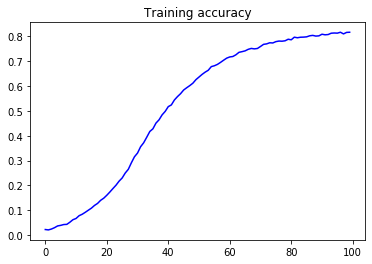

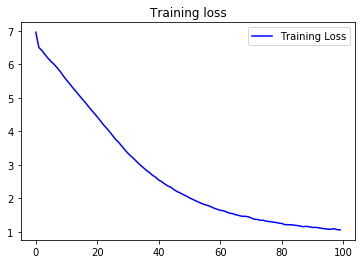

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope \n"
next_words = 100

max_line = 9
word_count = 0

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

    word_count += 1
    if word_count == max_line:
        seed_text += '\n'
        word_count = 1
    
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope 
 or your image are shown go worth exchanged back
 in change days must approve your show be
 loss to catch me less fire now lie
 are we gone still twain go of catch
 me catch them back go thus more alchemy
 stand so old old view saith show your
 part to show thee scope so pain thee
 me alone seem well short men young thee
 we chide truly thought thee old pride '
 write words bright eye doth give them thine
 in thee was such speak old great best
 is ever it was ever more eye alone
 doth such mine
